In [19]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = pd.DataFrame(np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]))
Y = pd.DataFrame(np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]))
display(x, Y)


,0
0,39
1,36
2,60
3,21
4,27
5,12
6,51
7,57
8,54
9,42


,0
0,1
1,0
2,1
3,1
4,1
5,0
6,1
7,1
8,1
9,0


Реализовать класс модели логистической регрессии с использованием:
а) максимизации логарифмического правдоподобия методом градиентного подъема
б) минимизации функции потерь (кросс-энтропии) методом градиентного спуска

Сравнить результаты (время исполнения и достигнутые значения accuracy и f1) в случаях а и б при одном и том же числе шагов и скорости обучения.



In [21]:
#Реализуем цикл градиентного спуска
class LogisticRegressionGD(object):
    def __init__(self):
        self.a = None
    def sigmoid(self, x):
        return 1./(1. + np.exp((-x @ self.a)))
    def predict(self, x):
        return self.sigmoid(x)
    def coefs(self):
        return self.a
    def LogLikelihood(self, x, Y):
        return (Y*np.log(self.predict(x)) + (1 - Y) * np.log(1 - self.predict(x))).sum() / len(x)
    def CrossEntropy(self, x, Y):
        return ((-Y*np.log(self.predict(x)) - (1- Y)*np.log(1 - self.predict(x))).sum()) / len(x)

    def accuracy(self, x, Y):
        return ((self.predict(x) > 0.5) == Y).mean()

    def f1_score(self, x, Y):
      df = pd.DataFrame()
      df['Y'] = Y
      df['Y_pred'] = self.predict(x)

      TP = df[(df['Y_pred'] > 0.5) & df['Y'] == 1]
      FP = df[(df['Y_pred'] > 0.5) & df['Y'] == 0]
      FN = df[(df['Y_pred'] < 0.5) & df['Y'] == 1]

      precision = len(TP) / (len(TP) + len(FP))
      recall = len(TP) / (len(TP) + len(FN))
      return 2*precision*recall / (precision + recall)

    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000, Rtype = "LL"):
        self.a = np.zeros(x.shape[1])
        steps, errors, f1_score = [], [], []
        step = 0
        for _ in range(max_steps):
            if Rtype == "LL":
                new_error = self.LogLikelihood(x, Y)
                dT_a = x.T @(Y - self.predict(x))
                self.a += alpha*dT_a
                f = self.f1_score(x, Y)
            elif Rtype == "CE":
                new_error = self.CrossEntropy(x, Y)
                #display(new_error)
                dT_a = -x.T @(Y - self.predict(x))
                self.a -= alpha*dT_a
                f = self.f1_score(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            f1_score.append(f)
            #if new_error < epsylon:
            #    break
        return steps, errors, f1_score

In [18]:
x_ = x.copy()
import time

intercept = np.ones((x.shape[0], 1))
x_ = pd.DataFrame(np.concatenate((intercept, x), axis = 1))


NameError: ignored

In [ ]:
start_time = time.time()
regr = LogisticRegressionGD()
steps, errors =  regr.fit(x_, Y, alpha = 0.01, epsylon = 0.01, max_steps = 20000, Rtype = "CE")

display('Время обучения: ', time.time() - start_time, 'сек.')

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by

'Время обучения: '

89.07326006889343

'сек.'

,0
0,-46.716601
1,0.872513


,0,1
0,1.0,39.0
1,1.0,36.0
2,1.0,60.0
3,1.0,21.0
4,1.0,27.0
5,1.0,12.0
6,1.0,51.0
7,1.0,57.0
8,1.0,54.0
9,1.0,42.0


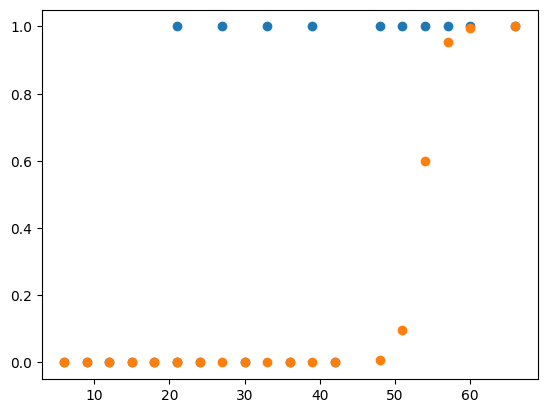

In [ ]:
display(regr.coefs())
display(x_)
Y_Pred = regr.predict(x_)



plt.scatter(x, Y)
plt.scatter(x, Y_Pred)



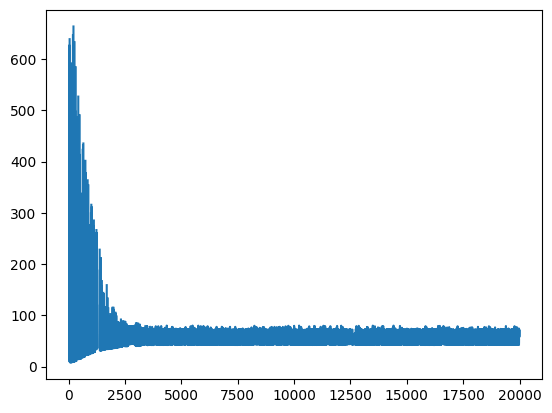

In [ ]:
plt.plot(steps, errors)

Реализовать расчеты способами а и б для набора данных из файла insclass_train.csv/
Для 151 406 договоров страхования транспортных средств известны значения ряда признаков, в том числе пол, возраст, стаж вождения и коэффициент бонус-малус водителя, тип, марка, модель, год выпуска, страна – производитель, мощность и объем двигателя, а также признак target, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае (файл insclass_train.csv).

Требуется построить модель, предсказывающую значение признака target для 22 624 договоров из тестового набора данных (файл insclass_test.csv).

В обучающем наборе данных для каждого договора известны следующие поля:

variable_1 - агрегированный коэффициент бонус-малус (повышающий или понижающий стоимость полиса в зависимости от аварийности в предыдущие периоды);

variable_2 - индикатор расторжения договора по инициативе страхователя (клиента);

variable_3 - индикатор расторжения договора по инициативе страховщика (страховой компании);

variable_4 - идентификатор года выпуска транспортного средства;

variable_5 - идентификатор страны - производителя транспортного средства;

variable_6 - мощность двигателя в лошадиных силах;

variable_7 - объем двигателя в куб. см;

variable_8 - идентификатор стороны расположения руля (левый или правый);

variable_9 - пробег транспортного средства, покрываемый гарантией производителя;

variable_10 - индикатор действия гарантии на транспортное средство;

variable_11 - "мультидрайв" - индикатор допуска к управлению транспортным средством более одного водителя;

variable_12 - возраст транспортного средства (в мес.);

variable_13 - возраст водителя с максимальным стажем;

variable_14 - коэффициент возраст-стаж;

variable_15 - коэффициент краткосрочности;

variable_16 - коэффициент мощности;

variable_17 - коэффициент "мультидрайв";

variable_18 - территориальный коэффициент;

variable_19 - коэффициент "КНДР";

variable_20 - идентификатор канала продаж;

variable_21 - марка транспортного средства;

variable_22 - модель транспортного средства;

variable_23 - индикатор отечественных транспортных средств;

variable_24 - пол водителя с максимальным коэффициентом "возраст-стаж";

variable_25 - индикатор пролонгации;

variable_26 - индикатор совпадения собственника транспортного средства и водителя;

variable_27 - стаж водителя с максимальным коэффициентом "возраст-стаж";

variable_28 - тип транспортного средства;

target - класс риска, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае.

In [4]:
data = pd.read_csv('./insclass_train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151406 entries, 0 to 151405
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   variable_1   151406 non-null  object 
 1   variable_2   151406 non-null  int64  
 2   variable_3   151406 non-null  int64  
 3   variable_4   151406 non-null  int64  
 4   variable_5   151406 non-null  object 
 5   variable_6   151295 non-null  float64
 6   variable_7   55767 non-null   float64
 7   variable_8   121507 non-null  float64
 8   variable_9   16970 non-null   float64
 9   variable_10  151406 non-null  int64  
 10  variable_11  151406 non-null  int64  
 11  variable_12  149878 non-null  float64
 12  variable_13  149749 non-null  float64
 13  variable_14  148479 non-null  float64
 14  variable_15  13 non-null      float64
 15  variable_16  151394 non-null  float64
 16  variable_17  151394 non-null  float64
 17  variable_18  151394 non-null  float64
 18  variable_19  151406 non-

In [5]:
data.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,target
0,w200,0,0,14,q2,98.0,NaN,0.0,NaN,0,...,C,j2,h45,0,0.0,0,1,19.323463,t1,0
1,w160,0,0,7,q11,106.0,NaN,0.0,NaN,0,...,C,j33,h234,0,1.0,0,1,41.177900,t1,0
2,w200,0,0,4,q3,123.0,NaN,0.0,NaN,0,...,B,j12,h28,0,0.0,0,1,3.614395,t1,0
3,w200,0,0,9,q3,102.0,NaN,0.0,NaN,0,...,C,j12,h64,0,1.0,0,0,49.041674,t1,0
4,w200,0,0,18,q20,117.0,NaN,0.0,NaN,0,...,C,j111,h991,0,1.0,0,0,17.909612,t1,0


In [6]:
data = data.fillna(0)
data['variable_1'] = data['variable_1'].apply(lambda x: x[1:])
data = data.drop(['variable_5', 'variable_21', 'variable_22', 'variable_28'], axis=1)
data

,variable_1,variable_2,variable_3,variable_4,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,...,variable_17,variable_18,variable_19,variable_20,variable_23,variable_24,variable_25,variable_26,variable_27,target
0,200,0,0,14,98.0,0.0,0.0,0.0,0,0,...,80.985224,80.985224,127.113159,C,0,0.0,0,1,19.323463,0
1,160,0,0,7,106.0,0.0,0.0,0.0,0,0,...,80.985224,38.704257,148.905712,C,0,1.0,0,1,41.177900,0
2,200,0,0,4,123.0,0.0,0.0,0.0,0,0,...,80.985224,273.413449,154.244863,B,0,0.0,0,1,3.614395,0
3,200,0,0,9,102.0,0.0,0.0,0.0,0,0,...,80.985224,80.985224,131.067787,C,0,1.0,0,0,49.041674,0
4,200,0,0,18,117.0,0.0,0.0,0.0,0,0,...,80.985224,118.116608,131.067787,C,0,1.0,0,0,17.909612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151401,48,0,0,3,123.0,0.0,0.0,0.0,0,0,...,80.985224,98.648082,181.463784,C,0,1.0,0,1,12.200897,0
151402,160,0,0,6,123.0,1591.0,0.0,150000.0,0,0,...,80.985224,38.704257,131.419341,C,0,1.0,0,1,31.787491,0
151403,200,0,0,7,158.0,1998.0,0.0,0.0,0,0,...,80.985224,139.401847,181.463784,C,0,0.0,0,1,7.883271,0
151404,48,0,0,3,82.0,0.0,0.0,0.0,0,0,...,80.985224,162.514016,122.974203,B,0,1.0,0,1,20.731525,0


In [7]:
y = data['target']
data.drop('variable_3', axis= 1 , inplace= True )
data.drop('target', axis= 1 , inplace= True )
data = pd.concat([data, pd.get_dummies(data['variable_20'], drop_first=True)], axis = 1)
data = data.drop(['variable_20'], axis = 1)
data

,variable_1,variable_2,variable_4,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,...,variable_18,variable_19,variable_23,variable_24,variable_25,variable_26,variable_27,A,B,C
0,200,0,14,98.0,0.0,0.0,0.0,0,0,166.266987,...,80.985224,127.113159,0,0.0,0,1,19.323463,0,0,1
1,160,0,7,106.0,0.0,0.0,0.0,0,0,80.338555,...,38.704257,148.905712,0,1.0,0,1,41.177900,0,0,1
2,200,0,4,123.0,0.0,0.0,0.0,0,0,38.519899,...,273.413449,154.244863,0,0.0,0,1,3.614395,0,1,0
3,200,0,9,102.0,0.0,0.0,0.0,0,0,109.845800,...,80.985224,131.067787,0,1.0,0,0,49.041674,0,0,1
4,200,0,18,117.0,0.0,0.0,0.0,0,0,224.168209,...,118.116608,131.067787,0,1.0,0,0,17.909612,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151401,48,0,3,123.0,0.0,0.0,0.0,0,0,13.635261,...,98.648082,181.463784,0,1.0,0,1,12.200897,0,0,1
151402,160,0,6,123.0,1591.0,0.0,150000.0,0,0,68.071719,...,38.704257,131.419341,0,1.0,0,1,31.787491,0,0,1
151403,200,0,7,158.0,1998.0,0.0,0.0,0,0,76.689904,...,139.401847,181.463784,0,0.0,0,1,7.883271,0,0,1
151404,48,0,3,82.0,0.0,0.0,0.0,0,0,0.000000,...,162.514016,122.974203,0,1.0,0,1,20.731525,0,1,0


In [8]:
data = data.astype(float).astype (int)
data = data.astype(str).astype (int)

In [9]:
data.isna().sum()

variable_1     0
variable_2     0
variable_4     0
variable_6     0
variable_7     0
variable_8     0
variable_9     0
variable_10    0
variable_11    0
variable_12    0
variable_13    0
variable_14    0
variable_15    0
variable_16    0
variable_17    0
variable_18    0
variable_19    0
variable_23    0
variable_24    0
variable_25    0
variable_26    0
variable_27    0
A              0
B              0
C              0
dtype: int64

In [10]:
X = data.copy()
X = (X - X.mean()) / X.std() #нормализация данных
intercept = np.ones((X.shape[0], 1))
X = pd.DataFrame(np.concatenate((intercept, X), axis = 1))
X

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.313698,-0.131691,0.388735,-0.392937,-0.662809,-0.016458,0.00257,-0.132931,-0.14116,...,-0.422215,-0.670939,-0.502761,-1.629205,-0.328892,0.399170,0.343269,-0.448951,-0.349343,0.61823
1,1.0,-0.097724,-0.131691,-0.621971,-0.234297,-0.662809,-0.016458,0.00257,-0.132931,-0.14116,...,-1.042747,0.463787,-0.502761,0.613792,-0.328892,0.399170,2.170913,-0.448951,-0.349343,0.61823
2,1.0,0.313698,-0.131691,-1.055130,0.102815,-0.662809,-0.016458,0.00257,-0.132931,-0.14116,...,2.429275,0.787995,-0.502761,-1.629205,-0.328892,0.399170,-0.985927,-0.448951,2.862499,-1.61751
3,1.0,0.313698,-0.131691,-0.333197,-0.313617,-0.662809,-0.016458,0.00257,-0.132931,-0.14116,...,-0.422215,-0.454801,-0.502761,0.613792,-0.328892,-2.505184,2.835511,-0.448951,-0.349343,0.61823
4,1.0,0.313698,-0.131691,0.966282,-0.016166,-0.662809,-0.016458,0.00257,-0.132931,-0.14116,...,0.139218,-0.454801,-0.502761,0.613792,-0.328892,-2.505184,0.177119,-0.448951,-0.349343,0.61823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151401,1.0,-1.249705,-0.131691,-1.199517,0.102815,-0.662809,-0.016458,0.00257,-0.132931,-0.14116,...,-0.156273,2.246929,-0.502761,0.613792,-0.328892,0.399170,-0.238254,-0.448951,-0.349343,0.61823
151402,1.0,-0.097724,-0.131691,-0.766357,0.102815,0.871574,-0.016458,0.00257,-0.132931,-0.14116,...,-1.042747,-0.454801,-0.502761,0.613792,-0.328892,0.399170,1.340166,-0.448951,-0.349343,0.61823
151403,1.0,0.313698,-0.131691,-0.621971,0.796867,1.264091,-0.016458,0.00257,-0.132931,-0.14116,...,0.449484,2.246929,-0.502761,-1.629205,-0.328892,0.399170,-0.653628,-0.448951,-0.349343,0.61823
151404,1.0,-1.249705,-0.131691,-1.199517,-0.710218,-0.662809,-0.016458,0.00257,-0.132931,-0.14116,...,0.789299,-0.941112,-0.502761,0.613792,-0.328892,0.399170,0.426344,-0.448951,2.862499,-1.61751


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(121124, 26) (121124,) (30282, 26) (30282,)


In [14]:
X_train_mini = X_train[:30000]
y_train_mini = y_train[:30000]

In [15]:
print(X_train_mini.shape, y_train_mini.shape)

(30000, 26) (30000,)


In [22]:
first_model = LogisticRegressionGD()
start_time = time.time()
steps, errors, f1_score =  first_model.fit(X_train_mini, y_train_mini, alpha = 0.0000001, epsylon = 0.01, max_steps = 5000, Rtype = "CE")
print(f'Time: {time.time() - start_time}')
print(f'acc: {first_model.accuracy(X_test, y_test)}')

Time: 138.62579917907715
acc: 0.9105078924773793


In [23]:
print(f'acc: {first_model.accuracy(X_train_mini, y_train_mini)}')

acc: 0.9145333333333333


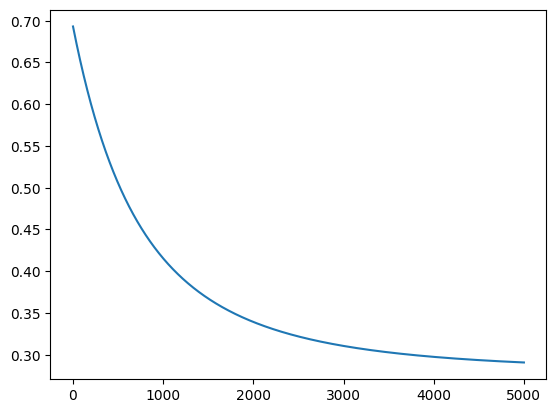

In [24]:

plt.plot(steps, errors)

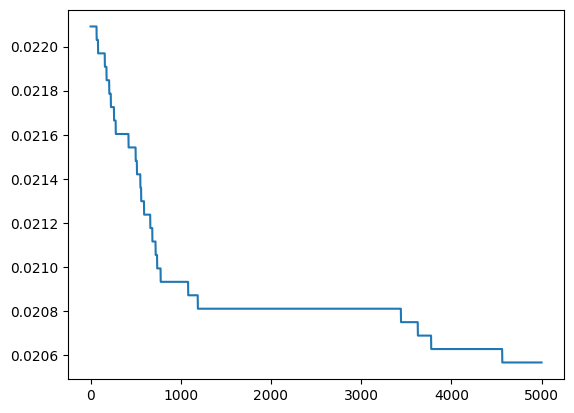

In [25]:
plt.plot(steps, f1_score)

In [26]:
second_model = LogisticRegressionGD()
start_time = time.time()
steps2, errors2, f1_score2 = second_model.fit(X_train_mini, y_train_mini, alpha = 0.0000001, epsylon = 0.01, max_steps = 5000, Rtype='LL')
print(f'Time: {time.time() - start_time}')
print(f'acc: {second_model.accuracy(X_test, y_test)}')

Time: 139.10167121887207
acc: 0.9105078924773793


In [27]:
print(f'acc: {second_model.accuracy(X_train_mini, y_train_mini)}')

acc: 0.9145333333333333


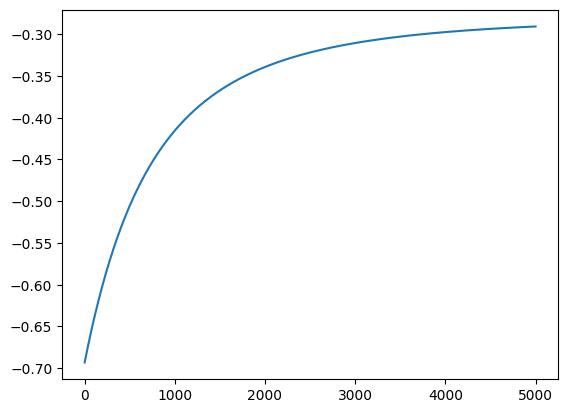

In [28]:
plt.plot(steps2, errors2)

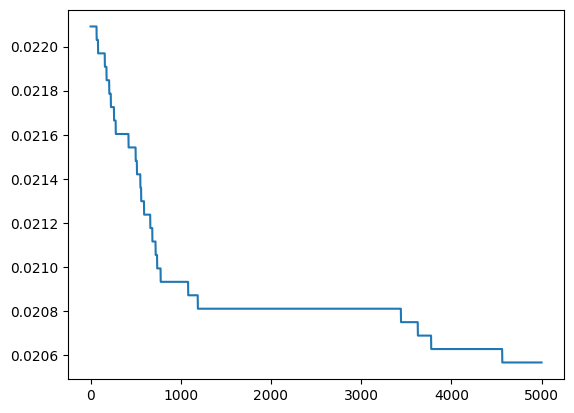

In [29]:
plt.plot(steps2, f1_score2)